<a href="https://colab.research.google.com/github/lukaszplust/Machine-Learning/blob/main/Engineer_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

CALCULATING ERROR

$$ \hat{y} = weight \cdot x + bias$$

$$ \hat{y} = w \cdot X + b $$
$$ X = [x_1, x_2, \dots, x_n] $$
$$ wX = [wx_1, wx_2, \dots, wx_n]$$
$$ \hat{y} = [wx_1 + b, wx_2 + b, \dots, wx_n + b]$$

$$ MSE = J(w,b) = 1/N \sum_{i=1}^{n} (y_i - (wx_i +b))^2$$

$$ J'(m,b) = \begin{bmatrix}
\frac{\partial f}{\partial w} \\
\frac{\partial f}{\partial b}
\end{bmatrix} = $$
\begin{bmatrix}
\frac{1}{N} \sum -2x_i \left( y_i - (w \cdot x_i + b) \right) \\
\frac{1}{N} \sum -2 \left( y_i - (w \cdot x_i + b) \right)
\end{bmatrix}

UPDATE PARAMETERS

$$ dJ/dw = dw = 1/N \sum_{i=1}^{n} -2x_i(y_i - (w \cdot x_i + b)) = 1/N \sum_{i=1}^{n} -2x_i(y_i - \hat{y}) = 1/N \sum_{i=1}^{n} 2x_i (\hat{y} - y_i)$$

$$ dJ/db = db = 1/N \sum_{i=1}^{n} -2(y_i - (w \cdot x_i + b)) = 1/N \sum_{i=1}^{n} -2(y_i - \hat{y}) = 1/N \sum_{k=1}^{n} 2(\hat{y} - y_i)$$

$$ X^T = \begin{bmatrix}
x_1 \\
x_2 \\
\vdots \\
x_n
\end{bmatrix} $$

$$ \hat{y} = [wx_1 + b, wx_2 + b, \dots, wx_n + b] = dw $$

GRADIENT DESCENT

$$
\text{weights} = \text{weights} - \text{learning_rate} \cdot \frac{\partial f}{\partial w}
$$

$$
\text{bias} = \text{bias} - \text{learning_rate} \cdot \frac{\partial f}{\partial b}
$$



Steps of fit function:

1. Initalize weights as 0. WHY np.zeros??

2. Initialize bias as 0

3. Predict result by using: $$ \hat{y} = w \cdot X + b $$

4. Calculate error

5. Figure out new weight and bias by using gradient descent (need dw and db)

6. Repeat it 'n_iter' times

In [44]:
class LinearRegression:

  def __init__(self, lr = 0.001, n_iters = 1000):
    self.lr = lr # learning rate
    self.n_iters = n_iters
    self.weights = None
    self.bias = None

  def fit(self, X, y):
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0

    for _ in range(self.n_iters):
      y_pred = np.dot(X, self.weights) + self.bias

      dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
      db = (1/n_samples) * np.sum(y_pred - y)

      self.weights -= self.lr * dw
      self.bias -= self.lr * db

  def predict(self, X):
    y_pred = np.dot(X, self.weights) + self.bias
    return y_pred

Dane wejściowe (X):
 [[-0.6075477 ]
 [-0.12613641]
 [ 0.92871475]
 [ 2.29249034]
 [-0.68460636]
 [-0.46700242]
 [-1.84440103]]
Rzeczywiste wartości (y):
 [ -32.52851243   27.0590021    68.80022501  163.77882906  -41.34367498
  -51.91837042 -116.31432484]
Dane treningowe (X_train):
 [[ 0.92871475]
 [-0.68460636]
 [-0.6075477 ]
 [ 2.29249034]
 [-1.84440103]]
Dane testowe (X_test):
 [[-0.46700242]
 [-0.12613641]]
Rzeczywiste wartości treningowe (y_train):
 [  68.80022501  -41.34367498  -32.52851243  163.77882906 -116.31432484]
Rzeczywiste wartości testowe (y_test):
 [-51.91837042  27.0590021 ]
Predictions: [-29.09324623  -3.43122922  52.79846349 125.49562239 -33.20092038
 -21.601367   -95.02471172]
Actual values: [ -32.52851243   27.0590021    68.80022501  163.77882906  -41.34367498
  -51.91837042 -116.31432484]


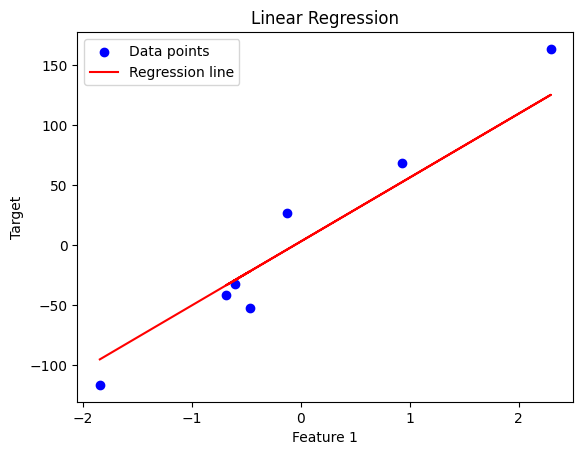

In [46]:
X,y = datasets.make_regression(n_samples=7, n_features= 1, noise= 30, random_state =40)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

print("Dane wejściowe (X):\n", X)
print("Rzeczywiste wartości (y):\n", y)
print("Dane treningowe (X_train):\n", X_train)
print("Dane testowe (X_test):\n", X_test)
print("Rzeczywiste wartości treningowe (y_train):\n", y_train)
print("Rzeczywiste wartości testowe (y_test):\n", y_test)
# Create a LinearRegression object
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

print("Predictions:", predictions)
print("Actual values:", y)

# Plotting the data and the regression line
plt.scatter(X[:, 0], y, color='blue', label='Data points')  # Scatter plot for the original data points
plt.plot(X[:, 0], predictions, color='red', label='Regression line')  # Plot the regression line
plt.xlabel('Feature 1')  # Label for x-axis
plt.ylabel('Target')  # Label for y-axis
plt.title('Linear Regression')  # Title of the plot
plt.legend()
plt.show()